In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import Time_series_funcs 

In [170]:
energy=pd.read_csv('EnergyProduction.csv')

In [171]:
energy.sample(5)

,DATE,EnergyIndex
99,1978-04-01,51.4137
71,1975-12-01,54.4112
107,1978-12-01,60.7576
205,1987-02-01,70.2540
57,1974-10-01,47.1173


In [172]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
DATE           240 non-null object
EnergyIndex    240 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


In [173]:
energy['DATE']=pd.to_datetime(energy.DATE)

In [174]:
energy.set_index('DATE',inplace=True)

In [175]:
energy.index.freq='MS'

In [176]:
energy.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### Do an ETS decomposition

C:\Users\gaura\AppData\Local\Continuum\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


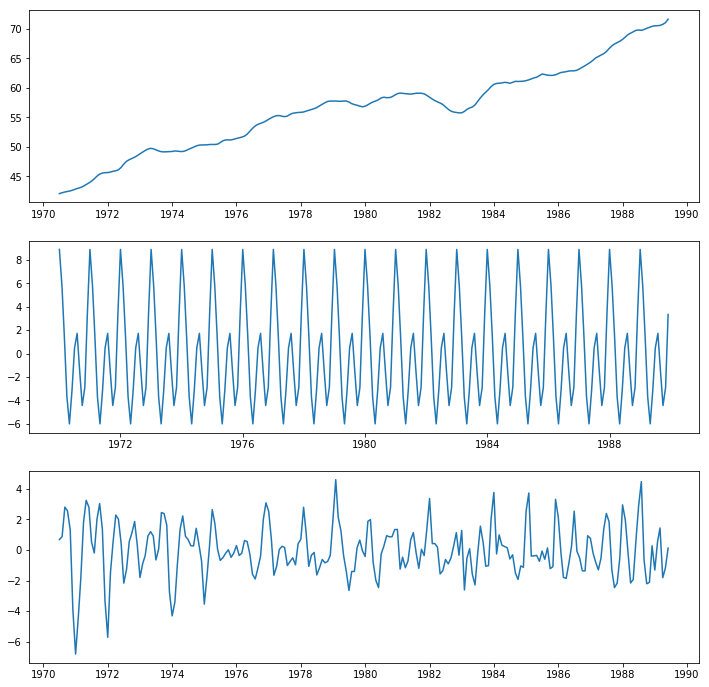

In [177]:
fig=Time_series_funcs.seasonal_decompose_data(energy)
fig.show();

### Do a Train test split

In [178]:
# Do a train test split
train=energy.iloc[:220,:].copy()
test=energy.iloc[220:,:].copy()

In [179]:
train.tail()

,EnergyIndex
DATE,
1987-12-01,70.7671
1988-01-01,80.0833
1988-02-01,76.3631
1988-03-01,70.4954
1988-04-01,63.4244


In [180]:
test.head()

,EnergyIndex
DATE,
1988-05-01,61.5776
1988-06-01,67.2741
1988-07-01,73.1676
1988-08-01,75.9479
1988-09-01,67.7223


### Apply the models

#### Apply the Simple exponential Moving average model

In [181]:
span=12
alpha=2/(span+1)

In [182]:
model=SimpleExpSmoothing(train.EnergyIndex)
fitted_model=model.fit(smoothing_level=alpha,optimized=False)
train['SESA']=fitted_model.fittedvalues.shift(-1)

#### Apply the double exponential moving average

In [183]:
model2=ExponentialSmoothing(train.EnergyIndex,trend='add',seasonal='add',seasonal_periods=12)

In [184]:
fitted_model2=model2.fit()
train['TESA']=fitted_model2.fittedvalues

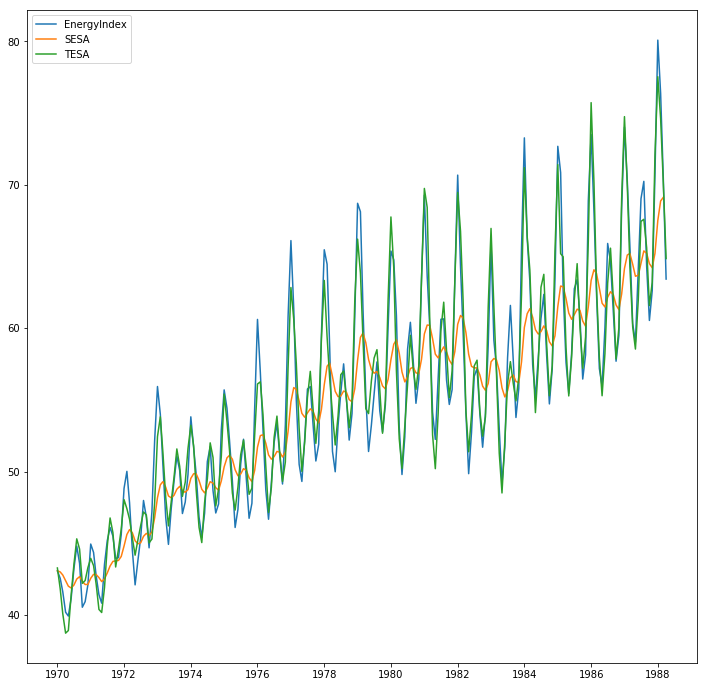

In [185]:
plt.figure(figsize=(12,12))
plt.plot(train)
plt.legend(train.columns)

In [186]:
from sklearn.metrics import mean_absolute_error as mae

In [187]:
preds_SESA=fitted_model.forecast(20)

In [188]:
preds_DESA=fitted_model2.forecast(20)

In [189]:
mae(test.EnergyIndex,preds_SESA)

4.978423605869221

In [190]:
mae(test.EnergyIndex,preds_DESA)

1.9330161525251406

In [191]:
test['SESA']=preds_SESA

In [193]:
test['TESA']=preds_DESA

In [194]:
test

,EnergyIndex,SESA,TESA
DATE,,,
1988-05-01,61.5776,68.243482,62.732045
1988-06-01,67.2741,68.243482,66.712950
1988-07-01,73.1676,68.243482,71.092284
1988-08-01,75.9479,68.243482,71.091311
1988-09-01,67.7223,68.243482,66.081869
1988-10-01,63.4592,68.243482,62.731859
1988-11-01,65.2706,68.243482,65.016503
1988-12-01,74.0492,68.243482,73.782881
1989-01-01,78.1368,68.243482,81.658770


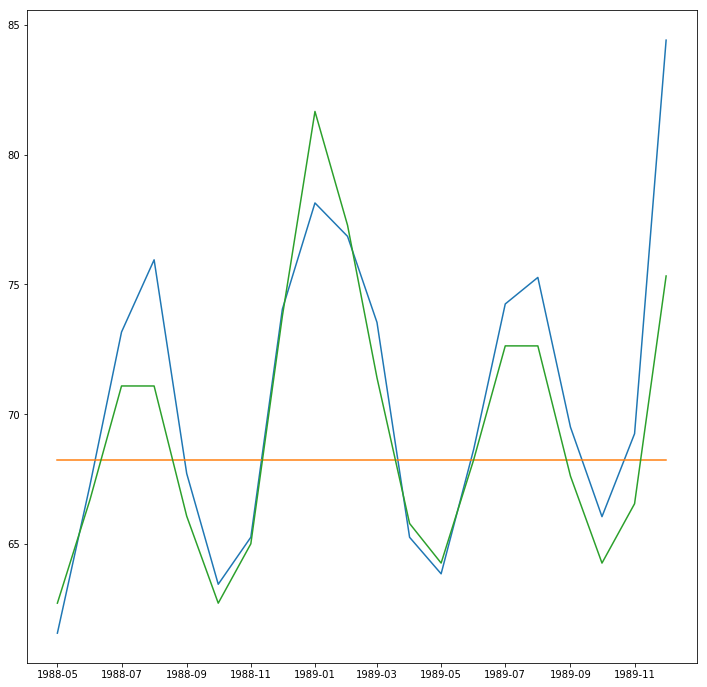

In [196]:
plt.figure(figsize=(12,12))
plt.plot(test)